# 1. 한글폰트

https://hangeul.naver.com/2017/nanum

In [22]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm.get_fontconfig_fonts()
#font_location = '/Library/Fonts/Arial Unicode.ttf' # for 맥
#plt.rc('font', family='NanumGothicOTF')
font_location = 'C:/Users/KIMMINKYU/Downloads/NanumFontSetup_TTF_ALL/NanumGothic.ttf' # for windows
print(plt.rcParams['font.family'])

# font_name = fm.FontProperties(fname=font_location).get_name()
# print(plt.rc('font', family=font_name))

['NanumGothic']


In [23]:
# colab용
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 2. 덴드로그램

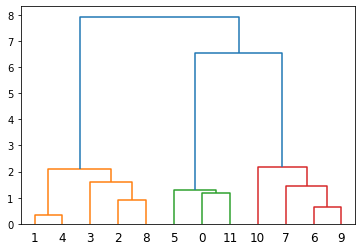

In [47]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import make_blobs

# 데이터 배열 X 에 ward 함수를 적용합니다
X, y = make_blobs(random_state=0, n_samples=12)

# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
# ax = plt.gca()
# bounds = ax.get_xbound()
# ax.plot(bounds, [7.25, 7.25], '--', c='k')
# ax.plot(bounds, [4, 4], '--', c='k')

# ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
# ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
# plt.xlabel("샘플 번호")
# plt.ylabel("클러스터 거리")
plt.show();

# 3. graphviz, pydot

https://graphviz.org/download/

In [24]:
!pip install pydot

In [5]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

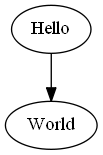

In [7]:
import pydot
from IPython.core.display import Image

command = """

digraph G {Hello->World}

"""

graph = pydot.graph_from_dot_data(command)[0]
image = graph.create_png()
Image(image)

# 3. pd.melt(), stack(), unstack()

![pd.melt()](./pd.melt.jpeg)

![pd.stack()](./pd.stack.jpeg)

In [27]:
import pandas as pd
df = pd.DataFrame({
    'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
    'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
    'pch_cnt' : [1, 2, 3, 4],
    'pch_amt' : [100, 200, 300, 400]})
df

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [30]:
pd.melt(data, id_vars=['cust_ID', 'prd_CD'])

,cust_ID,prd_CD,variable,value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [37]:
import numpy as np
df = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])

df

A           B      
           C     D     C     D
M id_1 -0.23  0.34  0.89  0.88
  id_2 -0.38  1.07 -0.06  0.15
  id_3 -0.04 -0.01 -1.14 -1.77
F id_1 -0.46  0.37  0.52 -0.14
  id_2 -0.48  0.81  0.64  1.95
  id_3 -0.60  0.23  0.58 -0.12

In [40]:
df.unstack().stack()

A           B      
           C     D     C     D
F id_1 -0.46  0.37  0.52 -0.14
  id_2 -0.48  0.81  0.64  1.95
  id_3 -0.60  0.23  0.58 -0.12
M id_1 -0.23  0.34  0.89  0.88
  id_2 -0.38  1.07 -0.06  0.15
  id_3 -0.04 -0.01 -1.14 -1.77

In [41]:
df.melt()

,variable_0,variable_1,value
0,A,C,-0.23
1,A,C,-0.38
2,A,C,-0.04
3,A,C,-0.46
4,A,C,-0.48
5,A,C,-0.60
6,A,D,0.34
7,A,D,1.07
8,A,D,-0.01
9,A,D,0.37
